## Introduction
In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular Jupyter Notebook, you'll practice creating single-variable plots for categorical data.

The cells where you are expected to contribute, are highlighted with **TO DO** markdown. 

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_bivariate import *

## About the Dataset
In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [2]:
df = pd.read_csv('data/fuel-econ.csv')
df.shape

(3929, 20)

In [3]:
df.head(4)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5


### Exercise 1: Categorical Plot
Use a plot to explore whether or not there are differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) 


**Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

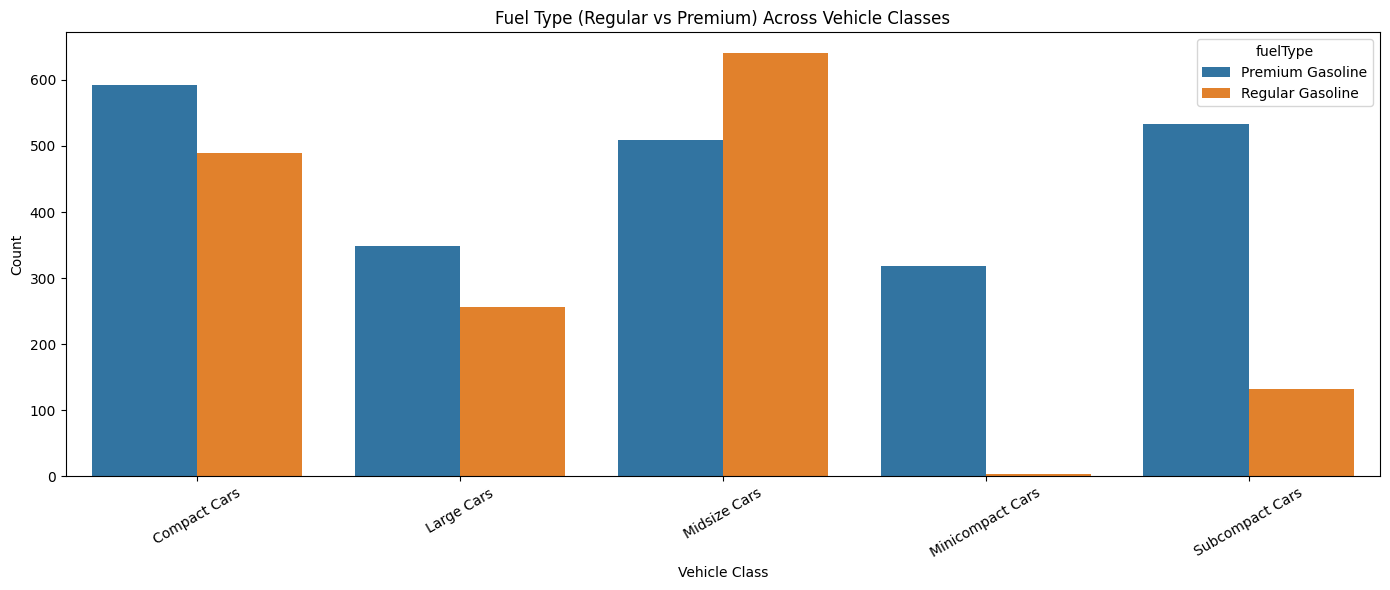

In [4]:
# YOUR CODE HERE
import seaborn as sns
import matplotlib.pyplot as plt

# Filter to only the two main fuel types
df_main = df[df['fuelType'].isin(['Regular Gasoline', 'Premium Gasoline'])]

# Sort vehicle classes alphabetically (or any custom order you used earlier)
vclass_order = sorted(df_main['VClass'].unique())

plt.figure(figsize=(14, 6))

sns.countplot(
    data=df_main,
    x='VClass',
    hue='fuelType',
    order=vclass_order
)

plt.xlabel("Vehicle Class")
plt.ylabel("Count")
plt.title("Fuel Type (Regular vs Premium) Across Vehicle Classes")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Expected Output: Exercise #1

Once you've created your chart, run the cell below to check the output from our solution. **Your visualization does not need to be exactly the same as ours, but it should be able to come up with the same conclusions.**


    There are definitely differences in recommended fuel type depending on the vehicle class.
    Minicompact and subcompact cars overwhelming use premium gasoline, while midsize cars use regular
    gas to premium by about 20%. Compact and large cars prefer premium by a smaller margin.
    


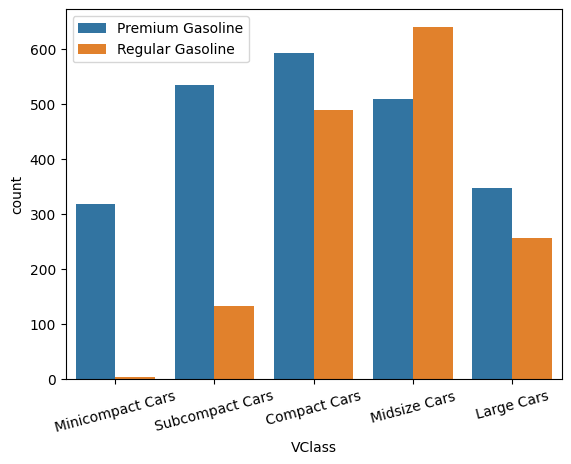

In [5]:
categorical_solution_1()

### Exercise 2: Facet Plot
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

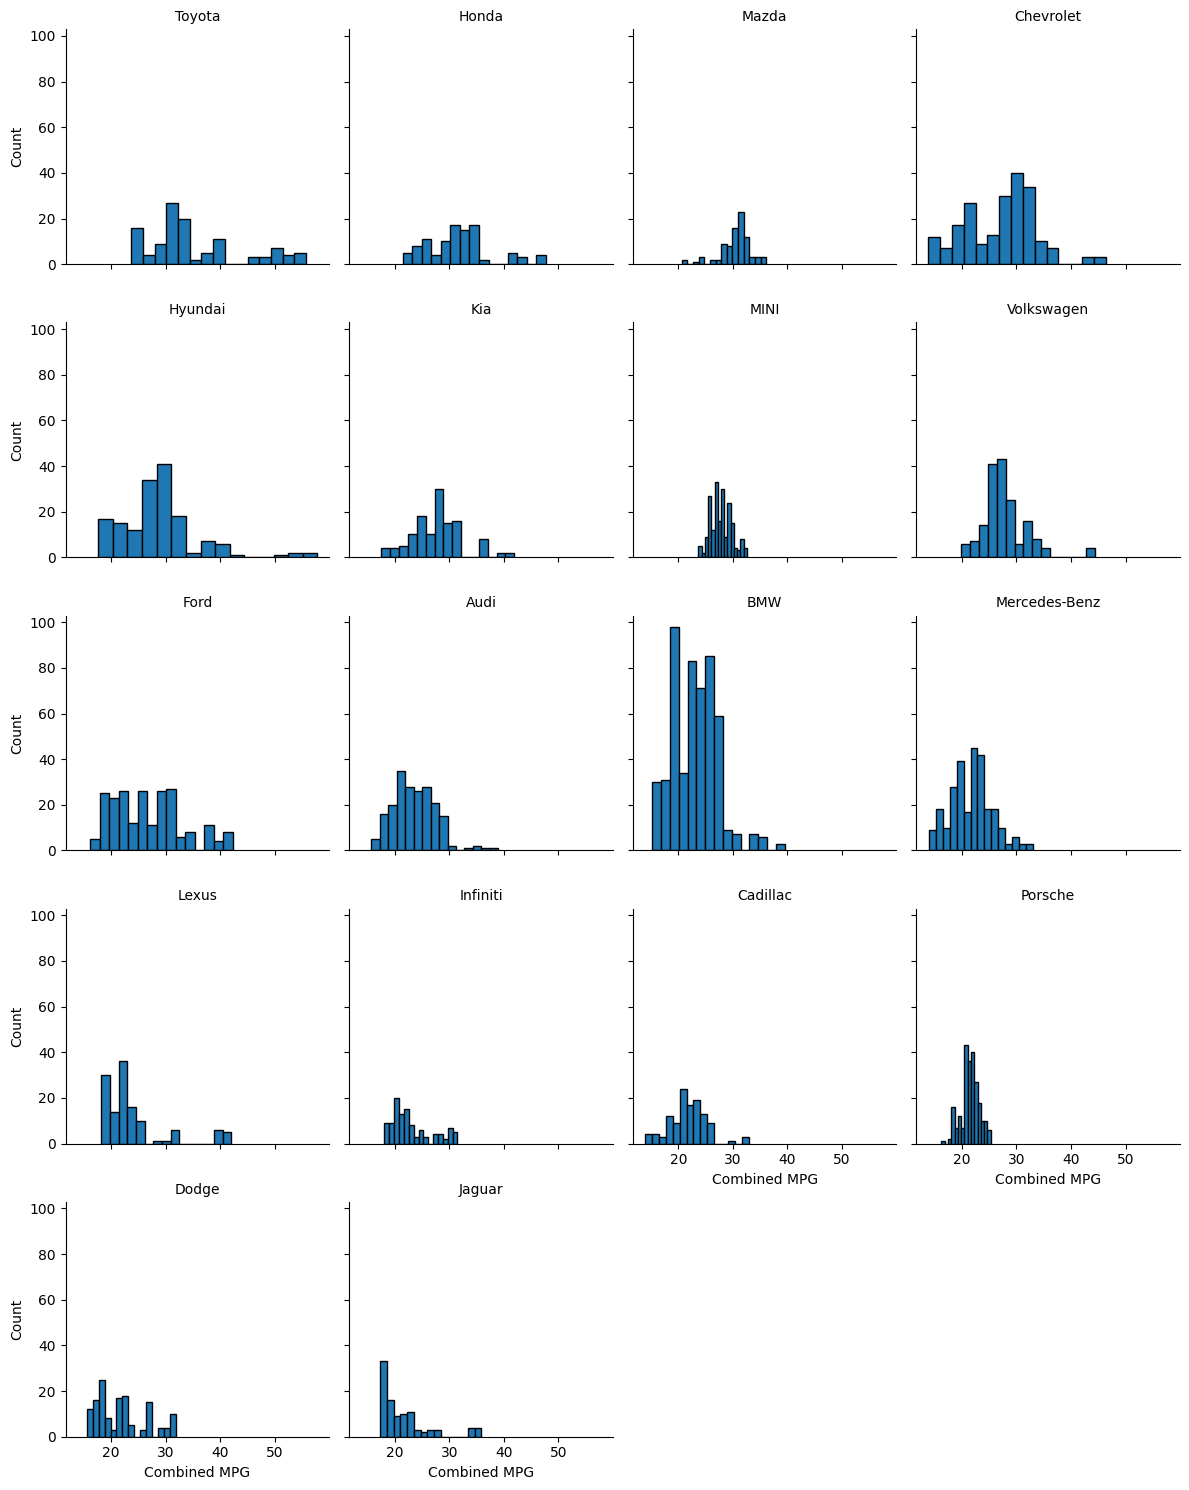

In [6]:
# YOUR CODE HERE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count cars per manufacturer
make_counts = df['make'].value_counts()
big_makes = make_counts[make_counts >= 80].index
big_makes

df_big = df[df['make'].isin(big_makes)].copy()

make_order = (
    df_big.groupby('make')['comb']
    .median()
    .sort_values(ascending=False)
    .index
)
make_order

g = sns.FacetGrid(
    df_big,
    col='make',
    col_wrap=4,
    col_order=make_order,
    sharex=True,
    sharey=True,
    height=3
)

g.map(plt.hist, 'comb', bins=15, edgecolor='black')

g.set_axis_labels("Combined MPG", "Count")
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

### Expected Output: Exercise #2


    Due to the large number of manufacturers to plot, I've gone with a faceted plot of histograms rather
    than a single figure like a box plot. As part of setting up the FacetGrid object, I have sorted the
    manufacturers by average mileage, and wrapped the faceting into a six-column by three-row grid. One
    interesting thing to note is that there are a very large number of BMW cars in the data, almost twice
    as many as the second-most prominent maker, Mercedes-Benz. One possible refinement could be to change
    the axes to be in terms of relative frequency or density to normalize the axes, making the
    less-frequent manufacturers easier to read.
    
    NOTE: You may get a warning message depending on how you average various classes. In my code, I
    had to specify average numeric columns only, with numeric_only=True. This is because future
    versions of python will require this flag.
    
    


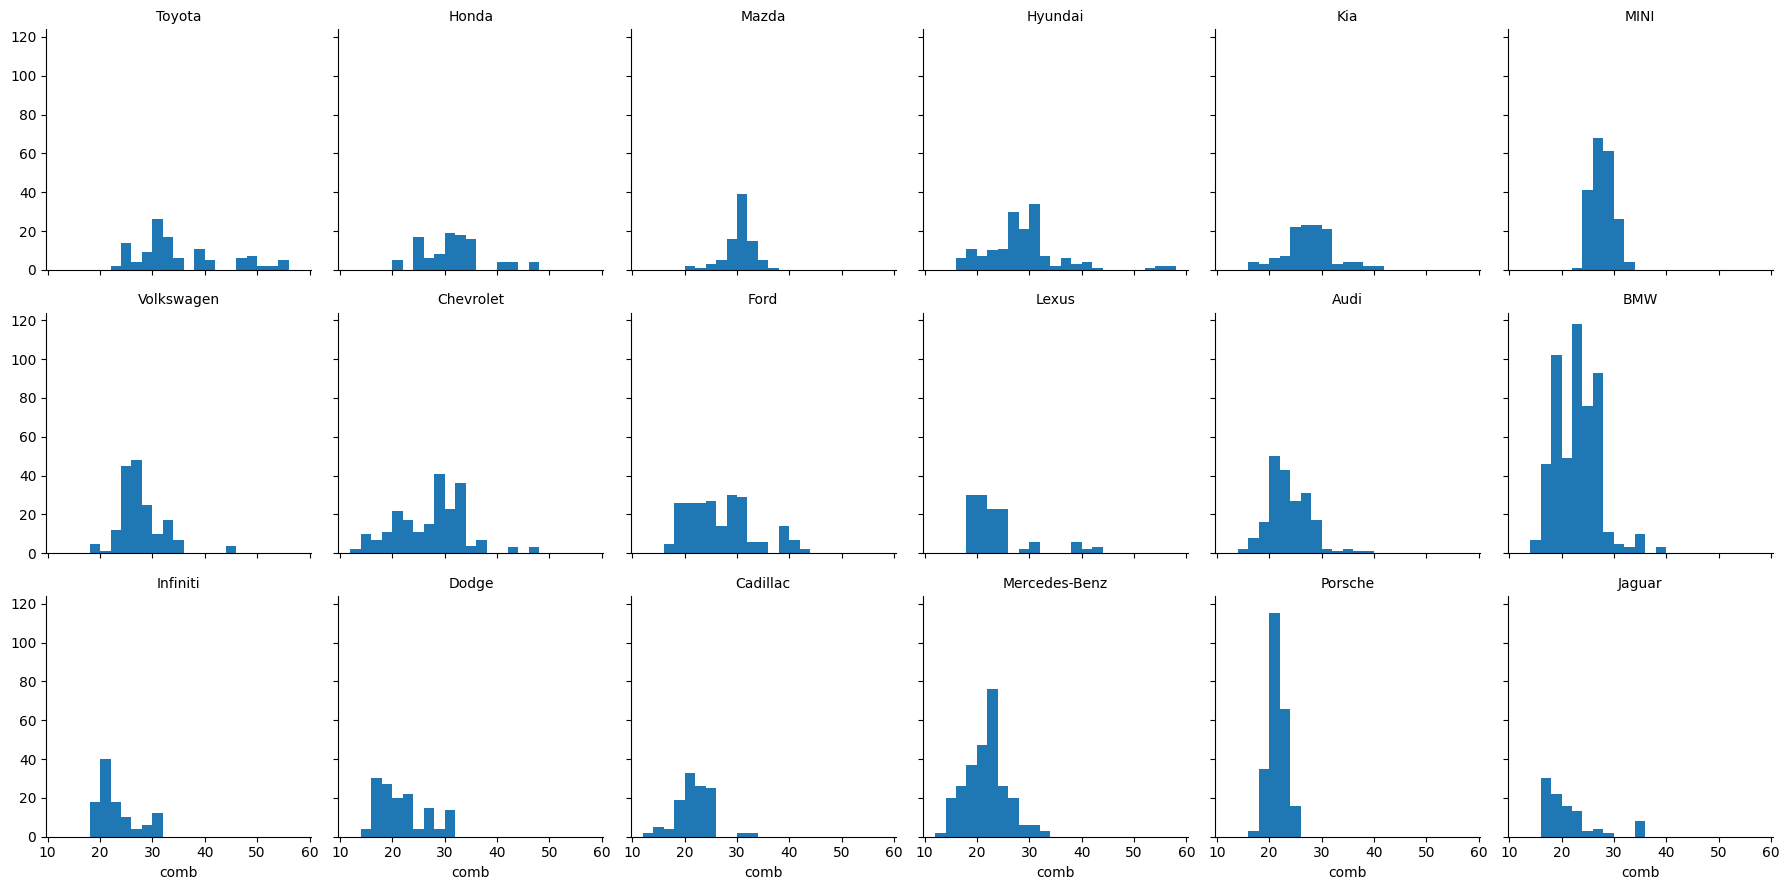

In [7]:
facet_plot_solution()

### Exercise 3: Cluster plot
Continuing on from the previous task, use a bar chart to plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset. Make sure to estimate the uncertainty by showing the standard deviation.

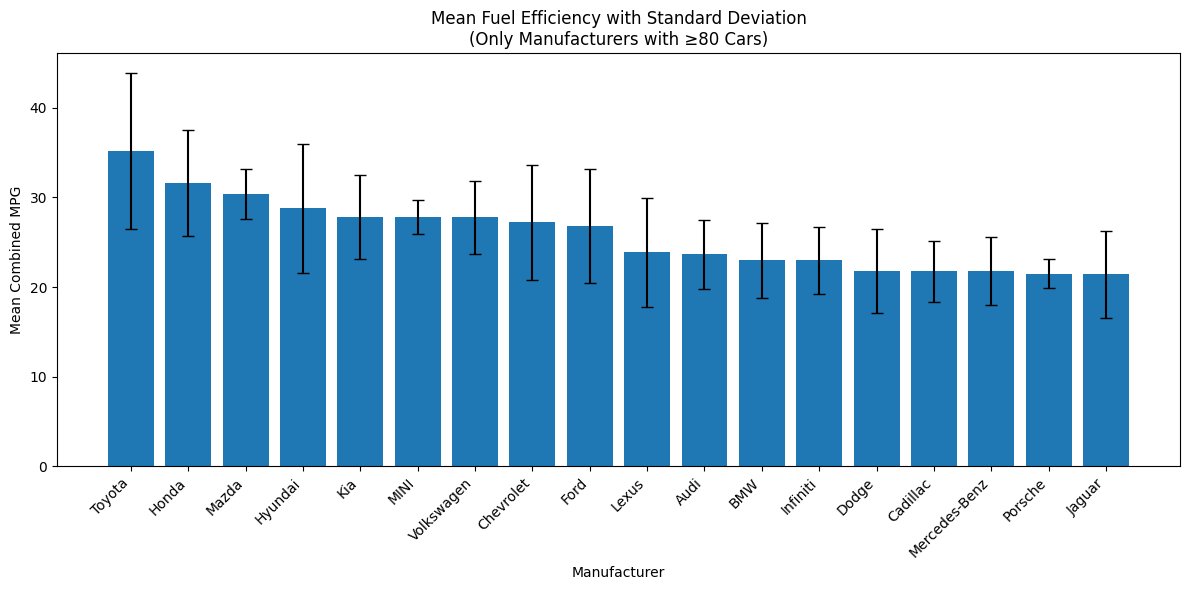

In [8]:
# YOUR CODE HERE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Count manufacturers and filter to those with >= 80 vehicles
make_counts = df['make'].value_counts()
big_makes = make_counts[make_counts >= 80].index

df_big = df[df['make'].isin(big_makes)].copy()

# 2. Compute mean and standard deviation for each manufacturer
stats = (
    df_big.groupby('make')['comb']
          .agg(['mean', 'std'])
          .sort_values('mean', ascending=False)
)

# 3. Plot with error bars
plt.figure(figsize=(12, 6))

plt.bar(
    x=stats.index,
    height=stats['mean'],
    yerr=stats['std'],
    capsize=4
)

plt.xlabel("Manufacturer")
plt.ylabel("Mean Combined MPG")
plt.title("Mean Fuel Efficiency with Standard Deviation\n(Only Manufacturers with ≥80 Cars)")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Expected output


    Seaborn's barplot function makes short work of this exercise. Since there are a lot of 'make' levels,
    I've made it a horizontal bar chart. In addition, I've set the error bars to represent the standard
    deviation of the car mileages.

    


/workspace/bivariate-exercises/solutions_bivariate.py:199: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  make_means = fuel_econ_sub.groupby('make').mean()


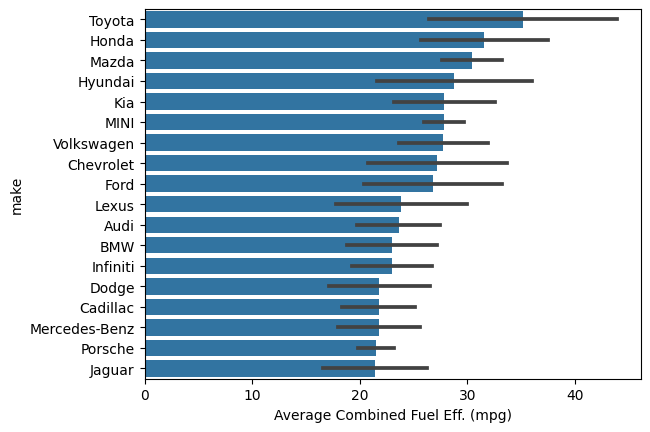

In [9]:
additional_plot()

If you're interested in seeing the code used to generate the solution plots, you can find it in the `solution_bivariate.py` script in the workspace folder. You can navigate there by clicking on the Jupyter icon in the upper left corner of the workspace. Spoiler warning: the script contains solutions for all of the workspace exercises in this lesson, so take care not to spoil your practice!